In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as st

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:06f}'.format

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ai = pd.read_csv(r'C:\Users\user\Desktop\Capstone Final\Data\Asia_Data.csv')

cols = ['Unnamed: 0',
        'Adjusted_savings_natural_resources_depletion_pct_of_GNI',
         'Adjusted_savings_net_forest_depletion_pct_of_GNI',
         'Agricultural_land_pct_of_land_area',
         'Agriculture_forestry_and_fishing_value_added_pct_of_GDP',
         'CO2_emissions_metric_tons_per_capita',
         'Electricity_production_from_coal_sources_pct_of_total',
         'Energy_imports_net_pct_of_energy_use', 
         'Energy_use_kg_of_oil_equivalent_per_capita',
         'Fossil_fuel_energy_consumption_pct_of_total',
         'GDP_growth_annual_pct',
         'Methane_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Population_density_people_per_sqkm_of_land_area',
         'Annual_CO2_emissions',
         'Share_of_global_CO2_emissions',
         'Consumption_based_tonnes',
         'Production_based_tonnes',
         'Cement_tonnes',
         'Flaring_tonnes',
         'Oil_tonnes',
         'Coal_tonnes',
         'Gas_tonnes',
         'Per_capita_energy_use_kWh',
         'Share_of_population_living_in_extreme_poverty_pct',
         'GDP_per_capita_international_USD_constant_2011_international_USD',
         'Emission_intensity_kg_per_2011_PPP_USD_of_GDP',
         'Mean_Temp',
         'Mean_Rain',
         'Time',
         'Country_Code',
         'Country_Name',
         'Continent',
         'Continent_code']

ai.columns = cols
ai.head()

,Unnamed: 0,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Code,Country_Name,Continent,Continent_code
0,1,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,AFG,Afghanistan,Asia,AS
1,2,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,ARE,United Arab Emirates,Asia,AS
2,3,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,ARM,Armenia,Asia,AS
3,4,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,AZE,Azerbaijan,Asia,AS
4,5,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,BGD,Bangladesh,Asia,AS


In [3]:
ai_c = pd.read_csv('ai_c_final.csv')
ai_n_new = pd.read_csv('ai_n_transformed.csv')

ai_c.drop('Unnamed: 0', axis=1, inplace=True)
ai_n_new.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
ai_n_new.head()

,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time
0,1.206095,1.496638,0.951570,0.659316,-1.414285,-0.766812,1.642149,-1.086351,-0.396566,0.298908,-0.042803,0.919099,-0.925236,-1.462383,-0.981367,-0.752706,-1.462383,-0.730312,-0.835127,-1.413081,0.160395,-1.417996,-0.341735,-0.333393,-0.940720,-0.813666,-0.827173,-0.391854,1961
1,1.177125,1.746818,-1.735486,0.456379,-1.336022,1.371956,-0.825787,0.647561,-0.402547,-0.139148,1.082678,1.017781,-2.218333,-2.709714,-1.019485,-0.752706,-2.709714,-1.837208,-0.835127,-2.401410,-1.328850,-1.417996,-0.341735,-0.333393,-0.940720,-0.813666,0.988825,-1.559791,1961
2,0.949495,1.420462,1.423568,0.958151,-1.186496,-0.766812,-0.693360,-1.111856,-0.924893,-1.099537,-0.782750,-0.585592,0.080021,-0.852487,-0.824307,-0.752706,-0.852487,-0.388184,-0.835127,-0.326946,0.446844,0.130510,-0.341735,-0.333393,-0.940720,-0.813666,-1.376173,-0.393895,1961
3,0.514858,-0.748922,1.040645,0.548300,0.123104,-0.766812,-0.174055,-0.957783,0.744012,0.355572,-0.494454,-1.026316,-0.135987,0.055067,0.321656,-0.752706,0.055067,-0.212558,-0.835127,0.137706,0.325589,0.480956,-0.341735,-0.333393,-0.940720,-0.813666,-0.886188,-0.423133,1961
4,-0.998514,-0.761911,1.350463,1.928686,-1.082001,0.586175,1.612150,-1.104396,-0.886522,0.054375,0.159110,1.483589,1.128075,-0.896512,-0.845044,-0.752706,-0.896512,-0.988761,-0.835127,-0.844709,0.378241,-0.223152,-0.341735,-0.333393,-0.940720,-0.813666,0.730723,1.285976,1961


In [5]:
retaining_years = [1977, 1983, 1984, 1985, 1987, 1988]
retaining_years.extend(range(1990,2017))

In [6]:
ai_n_new_and_country = pd.concat([ai_n_new, ai_c], axis=1)

In [7]:
df_final = pd.DataFrame()

In [8]:
for i in retaining_years:
    df_final = pd.concat([df_final, ai_n_new_and_country[ai_n_new_and_country['Time']==i]], axis=0)

In [9]:
df_final = df_final[~((df_final['Country_Name']=='China') | (df_final['Country_Name']=='Brunei Darussalum') | (df_final['Country_Name']=='Qatar') | (df_final['Time']=='2011') | (df_final['Time']=='2012') | (df_final['Time']=='2013') | (df_final['Time']=='2014') | (df_final['Time']=='2015') | (df_final['Time']=='2016'))]

---

# CLUSTERING

In [10]:
data = df_final.set_index(keys=['Country_Name','Time'], inplace=False, drop=True)

In [11]:
data.head()

,,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain
Country_Name,Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1977,-0.678958,0.467893,0.966707,1.186339,-1.241656,-0.766812,0.869866,-1.546650,-0.623109,0.223315,-0.535626,-0.409478,-0.694377,-0.880864,-0.924338,-0.752706,-0.880864,-0.492876,1.086969,-0.984802,0.305423,-0.020213,-0.341735,-0.333393,-0.940720,-0.813666,-0.765966,-0.507146
United Arab Emirates,1977,1.963420,-0.761911,-1.718440,-1.696951,1.858172,-0.766812,-2.136400,1.289688,0.974159,1.863344,2.124483,0.500919,-1.117903,0.243719,0.134042,-0.752706,0.243719,-0.411084,1.399120,-0.158542,-1.328850,0.127025,-0.341735,-0.333393,-0.940720,-0.813666,1.069112,-1.341726
Armenia,1977,-0.466924,-0.752855,-0.165111,0.562688,-0.463138,0.771863,-0.311710,0.403362,-1.157692,-0.463526,-0.929771,-0.503102,0.340144,-0.552052,-0.802416,-0.752706,-0.552052,-0.145909,1.003528,0.000928,0.444675,0.383011,-0.341735,-0.333393,-0.940720,-0.813666,-1.465987,-0.061199
Azerbaijan,1977,-1.278642,-0.761911,1.533992,1.513319,0.542869,-0.766812,-0.880800,0.385672,-0.465478,0.203279,0.073815,0.253347,0.100516,0.382717,0.415397,-0.752706,0.382717,0.022897,1.077211,0.431886,0.303615,0.742503,-0.341735,-0.333393,-0.940720,-0.813666,-0.996263,-0.125823
Bangladesh,1977,-0.114372,1.830551,1.446351,1.610364,-1.377645,-0.766812,0.028329,-2.144596,-1.446471,-0.343712,-0.075971,-0.993194,1.361403,-0.536737,-0.794267,-0.752706,-0.536737,-0.336082,-0.835127,-0.475328,0.322349,0.196779,-0.341735,-0.333393,-0.940720,-0.813666,0.706614,1.243065


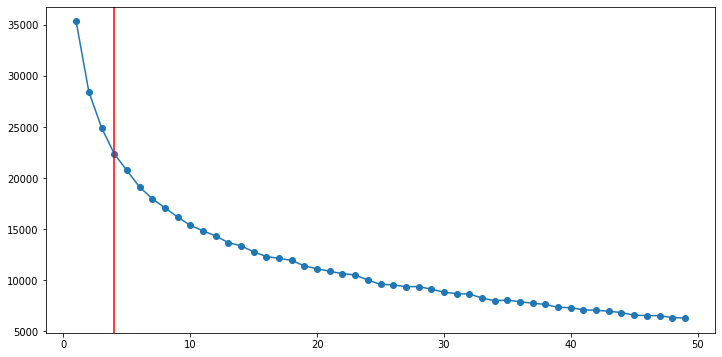

In [13]:
cluster_range = range( 1, 50)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_ 
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.axvline(x=4,color='r')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data)
    labels = kmeans.predict(data)
    print(i,'---',silhouette_score(data, labels))

2 --- 0.18227751546110976
3 --- 0.18175671387175477
4 --- 0.1942610311880064
5 --- 0.19739777122740598
6 --- 0.19065294671537308
7 --- 0.18344071383747768


**Thus, with elbow and silhouette scores, we witness the optimal k-value is 4**

## Hyper-parameter Tuning with Grid Search CV

In [16]:
kmeans = KMeans()

param_grid = {
    'n_clusters': range(5),
}

Gsearch_withoutPCA = GridSearchCV(kmeans, param_grid, cv=5)
Gsearch_withoutPCA.fit(data)

Gsearch_withoutPCA.best_params_

{'n_clusters': 4}

In [17]:
#with Principal Components

pca = PCA(n_components=13)
kmeans = KMeans()

pipe = Pipeline([('pca', pca), ('kmeans', kmeans)])

param_grid = {
    'kmeans__n_clusters': range(5),
}

Gsearch_withPCA = GridSearchCV(pipe, param_grid, cv=5)
Gsearch_withPCA.fit(data)

Gsearch_withPCA.best_params_

{'kmeans__n_clusters': 4}

**That with Grid Search CV (both- with and without PCA) as well as with Heirarchial Clustering representation (dendrogram), we witness the ideal no. of clusters formed/suggested are 4. We thus will perform Clustering again but for no. of cluster = 4.** 

## KMeans Clustering with PCA (no. of clusters=4)

In [18]:
pca = PCA(svd_solver='randomized', random_state=1)
pca.fit(data)

PCA(random_state=1, svd_solver='randomized')

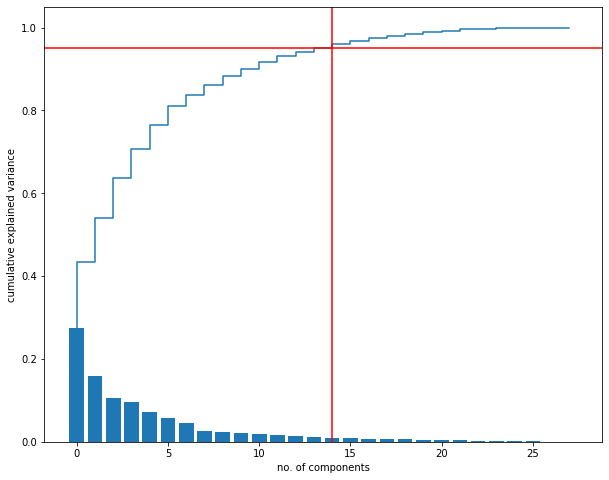

In [20]:
plt.figure(figsize=(10,8))
plt.step(y=np.cumsum(pca.explained_variance_ratio_), x=range(len(pca.explained_variance_ratio_)))
plt.bar(height=pca.explained_variance_ratio_, x=range(len(pca.explained_variance_ratio_)))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x=14,color='r')
plt.axhline(y=.95,color='r')
plt.show()

In [22]:
# for optimal hyper-parameters

pca = PCA(n_components=14)
kmeans = KMeans(n_clusters=4)
pipe = Pipeline([('pca', pca), ('kmeans', kmeans)])

# Fitting the input data

pipe.fit(data)

labels = pipe.predict(data)

In [23]:
data_pc = pd.DataFrame(pca.fit_transform(data))

In [24]:
ai_labeled_with_PCA_k4 = pd.DataFrame(data_pc.values)
ai_labeled_with_PCA_k4['Prediction'] = labels

In [25]:
# sns.pairplot(ai_labeled_with_PCA_k4, hue='Prediction', diag_kind='kde')
# plt.show()

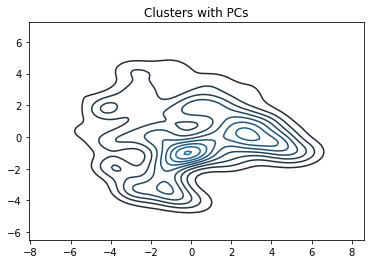

In [26]:
sns.kdeplot(ai_labeled_with_PCA_k4, hue='Prediction')
plt.title('Clusters with PCs')
plt.show()

## Imbalance Check wik KMeans Clustering

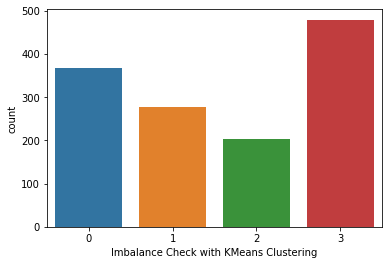

In [29]:
sns.countplot(ai_labeled_with_PCA_k4.Prediction)
plt.xlabel('Imbalance Check with KMeans Clustering')
plt.show()

# Heirarchial Clustering

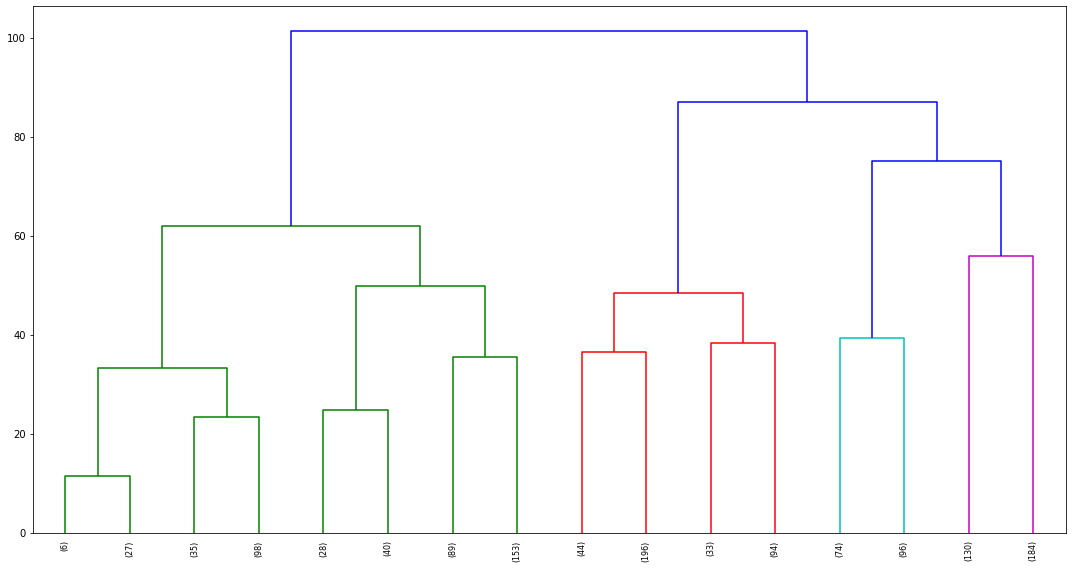

In [32]:
plt.figure(figsize=(15,8))
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method='ward')
dendrogram(merg,leaf_rotation=90,color_threshold=None,leaf_font_size=8,truncate_mode='level',p=3)
plt.tight_layout()

**With all the features available, the no. of heirarchial clusters observed is 4.**

In [33]:
# for optimal hyper-parameters

pca = PCA(n_components=14)
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
pipe = Pipeline([('pca', pca), ('agg', agg)])

# Fitting the input data

pipe.fit(data)

labels = pipe.named_steps['agg'].labels_ #predict(data)

data_pc = pd.DataFrame(pca.fit_transform(data))

In [34]:
ai_labeled_with_PCA_a4 = pd.DataFrame(data_pc.values)
ai_labeled_with_PCA_a4['Prediction'] = labels

## Imbalance Check with Agglomerative Clustering

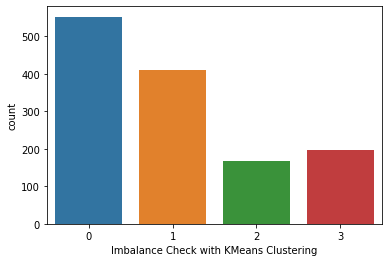

In [35]:
sns.countplot(ai_labeled_with_PCA_a4.Prediction)
plt.xlabel('Imbalance Check with KMeans Clustering')
plt.show()

---

# Model Validation with Decision Tree

### For Clustered data with Agglomerative Clustering ( no. of Clusters=4 )

In [36]:
x = ai_labeled_with_PCA_a4.drop('Prediction',axis=1)
y = ai_labeled_with_PCA_a4.Prediction

In [37]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

vif['VIF_factors'] = [VIF(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by='VIF_factors', ascending=False)

,VIF_factors,Features
0,1.000000,0
1,1.000000,1
2,1.000000,2
5,1.000000,5
6,1.000000,6
7,1.000000,7
9,1.000000,9
11,1.000000,11
12,1.000000,12
13,1.000000,13


In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=.20)

In [39]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=1,splitter='random')
gs_dt = GridSearchCV(dt, param_grid = {'max_depth' : list(range(7,10)),'min_samples_split':range(5), 'min_samples_leaf':range(5)}, cv=5)

gs_dt.fit(xtrain, ytrain)
gs_dt.best_params_

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [40]:
dt = DecisionTreeClassifier(max_depth=gs_dt.best_params_['max_depth'] ,
                            min_samples_split=gs_dt.best_params_['min_samples_split'] , 
                            criterion='entropy',random_state=1,splitter='random')
dt_model = dt.fit(xtrain, ytrain)
ypred = dt_model.predict(xtest)

In [41]:
# Feature importances check

importance_checker = pd.DataFrame(list(zip(xtrain.columns,dt_model.feature_importances_)), columns=['Features','Importances']).sort_values(by='Importances', ascending=False)
importance_checker

,Features,Importances
1,1,0.380762
0,0,0.311941
2,2,0.086754
3,3,0.083546
5,5,0.039867
9,9,0.024643
6,6,0.022301
10,10,0.013882
4,4,0.012304
12,12,0.007761


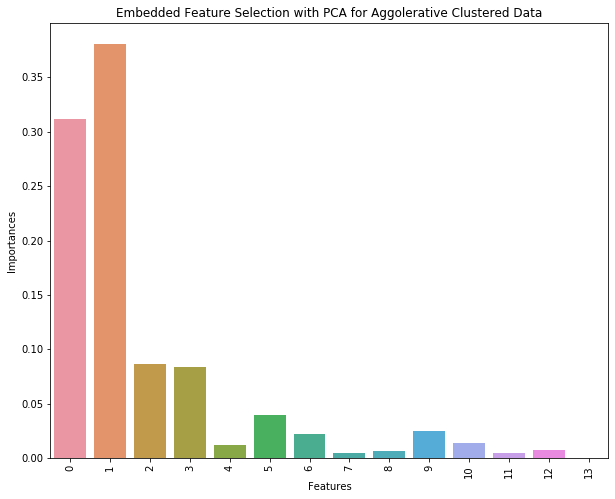

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(x=importance_checker.Features, y=importance_checker.Importances)
plt.title('Embedded Feature Selection with PCA for Aggolerative Clustered Data')
plt.xticks(rotation=90)
plt.show()

In [44]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.98      0.97      0.97        90
           2       1.00      1.00      1.00        34
           3       0.97      1.00      0.99        33

    accuracy                           0.98       266
   macro avg       0.98      0.99      0.98       266
weighted avg       0.98      0.98      0.98       266



### For Clustered data with KMeans Clustering ( where no. of Clusters=4)

In [45]:
x = ai_labeled_with_PCA_k4.drop('Prediction',axis=1)
y = ai_labeled_with_PCA_k4.Prediction

In [46]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

vif['VIF_factors'] = [VIF(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by='VIF_factors', ascending=False)

,VIF_factors,Features
7,1.000000,7
8,1.000000,8
11,1.000000,11
0,1.000000,0
1,1.000000,1
2,1.000000,2
3,1.000000,3
4,1.000000,4
5,1.000000,5
6,1.000000,6


In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=.20)

In [48]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=1,splitter='random')
gs_dt = GridSearchCV(dt, param_grid = {'max_depth' : list(range(12,17)),'min_samples_split':range(5), 'min_samples_leaf':range(5)}, cv=5)

gs_dt.fit(xtrain, ytrain)
gs_dt.best_params_

{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [49]:
dt = DecisionTreeClassifier(max_depth=gs_dt.best_params_['max_depth'] ,
                            min_samples_split=gs_dt.best_params_['min_samples_split'] , 
                            criterion='entropy',random_state=1,splitter='random')
dt_model = dt.fit(xtrain, ytrain)
ypred = dt_model.predict(xtest)

In [50]:
# Feature importances check

importance_checker = pd.DataFrame(list(zip(xtrain.columns,dt_model.feature_importances_)), columns=['Features','Importances']).sort_values(by='Importances', ascending=False)
importance_checker

,Features,Importances
0,0,0.343209
1,1,0.313126
3,3,0.143521
2,2,0.074101
5,5,0.052858
13,13,0.025660
4,4,0.019855
10,10,0.015501
8,8,0.003741
11,11,0.003571


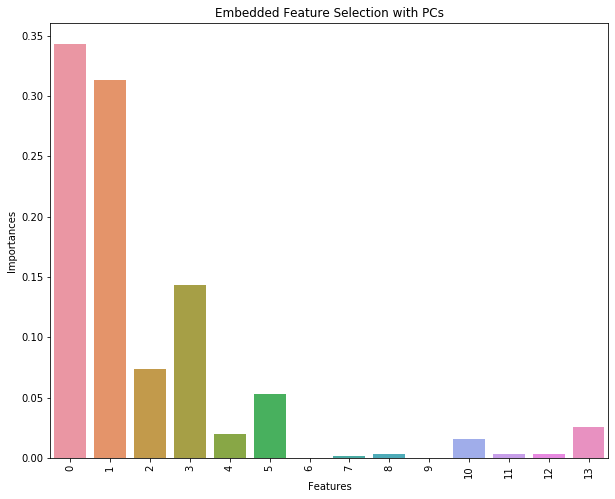

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x=importance_checker.Features, y=importance_checker.Importances)
plt.title('Embedded Feature Selection with PCs')
plt.xticks(rotation=90)
plt.show()

In [52]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        70
           1       0.98      0.95      0.96        58
           2       0.97      0.97      0.97        37
           3       1.00      0.98      0.99       101

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



In [263]:
# # ROC curve and AUC

# fpr, tpr, thresholds = roc_curve(ytest, ypred)
# roc_auc = auc(fpr, tpr)

# import pylab as pl
# pl.clf()
# pl.plot(fpr, tpr, label='ROC curve for Decision Tree (AUC = %0.2f)' % roc_auc)
# pl.plot([0, 1], [0, 1], 'k--')
# pl.xlabel('False Positive Rate')
# pl.ylabel('True Positive Rate')
# pl.title('Decision Tree for 4 Clusters with PCA')
# pl.legend(loc="lower right")
# pl.show()

## Sampling Effect Analysis

In [57]:
ypred_train = dt_model.predict(xtrain)
ypred_test = dt_model.predict(xtest)

In [59]:
train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

In [91]:
mse_arr = -(cross_val_score(estimator=dt_model, X=x, y=y, cv=5, scoring='neg_mean_squared_error'))

cv_rmse = (mse_arr**0.5).mean()

bias_error = mse_arr.mean()
variance_error = mse_arr.std()

coef_of_variance = bias_error/variance_error

In [92]:
print('RMSE of model prediction with train sample-',round(train_mse**0.5,3))
print('RMSE of model prediction with test sample-',round(test_mse**0.5,3))
print('RMSE with cross validation-',round(cv_rmse,3))
print('Bias Error with cross validation-',round(bias_error,3))
print('Variance Error cross validation-',round(variance_error,3))
print('Coefficient of Variance with cross validation-',round(coef_of_variance,3))

RMSE of model prediction with train sample- 0.075
RMSE of model prediction with test sample- 0.368
RMSE with cross validation- 0.382
Bias Error with cross validation- 0.155
Variance Error cross validation- 0.066
Coefficient of Variance with cross validation- 2.358


In [ ]:
sample_analysed_values = pd.DataFrame([train_mse**0.5, test_mse**0.5, cv_rmse], ['Train Sample RMSE','Test Sample RMSE', 'Cross Validation RMSE'])

g =sns.barplot(x='sex',y='survived',data=sample_analysed_values)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.survived, round(row.survived,2), color='black', ha="center")

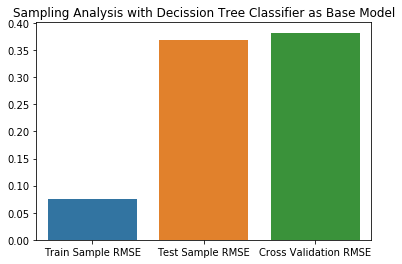

In [87]:
sns.barplot(y=[train_mse**0.5, test_mse**0.5, cv_rmse], x=['Train Sample RMSE','Test Sample RMSE', 'Cross Validation RMSE'])
plt.title('Sampling Analysis with Decission Tree Classifier as Base Model')
plt.show()

## Tree Diagram

In [41]:
import graphviz
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import os

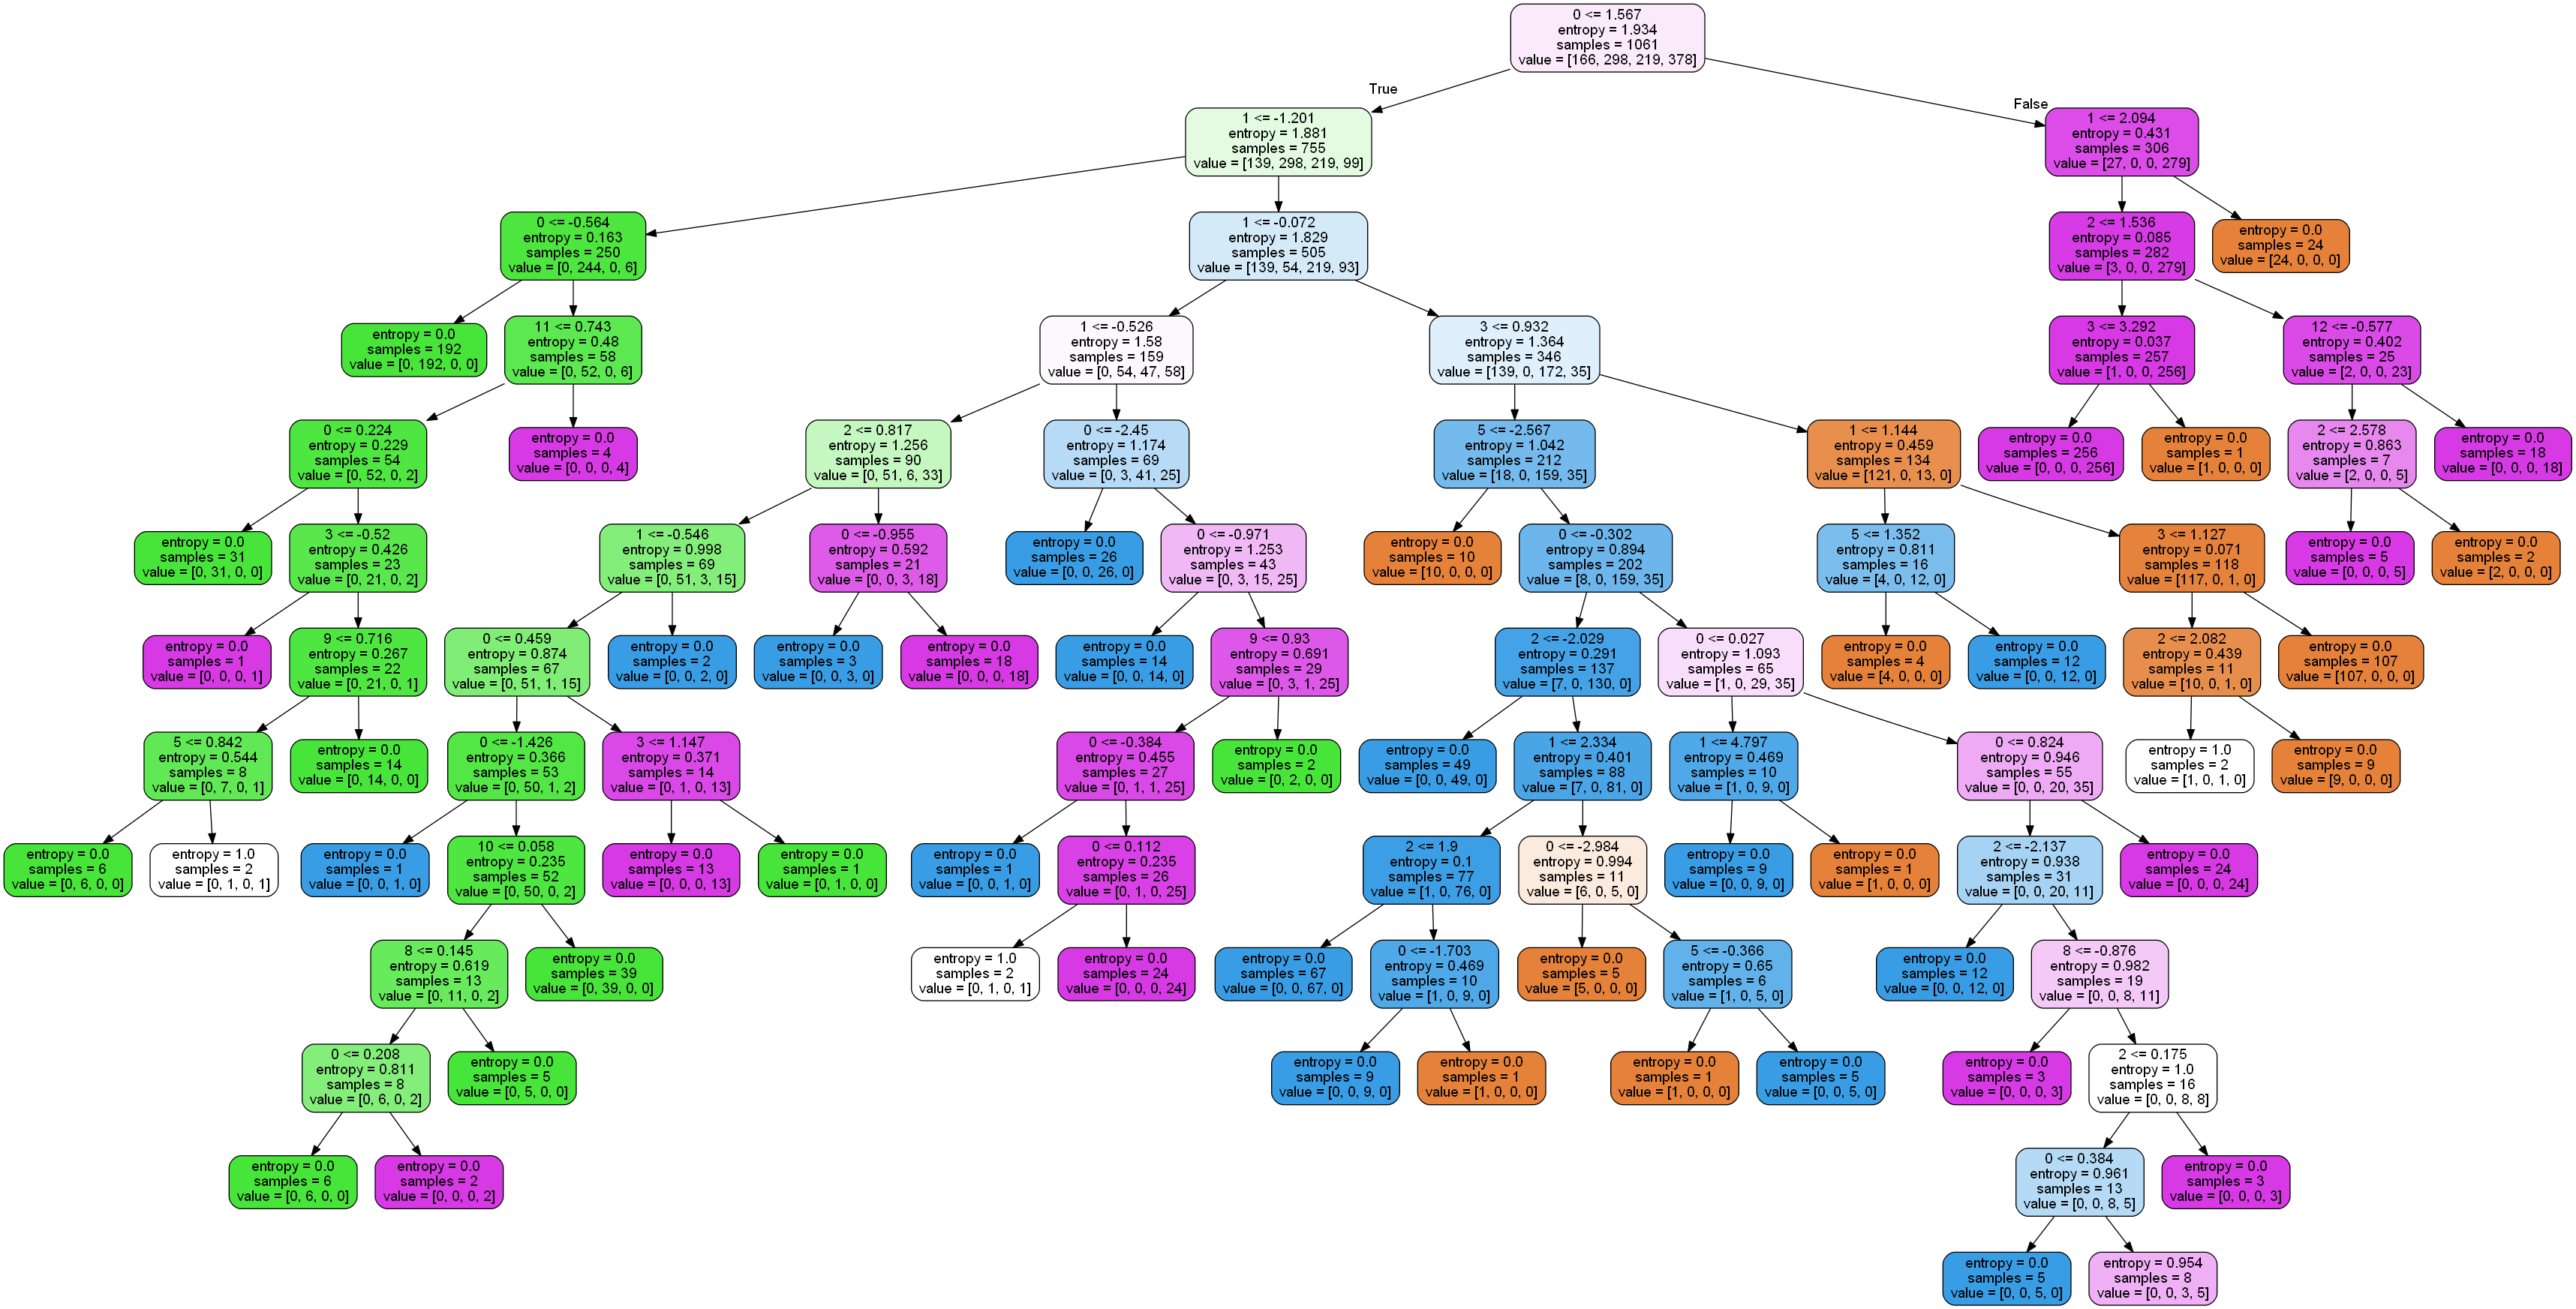

In [42]:
features = x.columns  #[1:]

os.environ["PATH"] += os.pathsep + 'C:/Graphviz-2.38/bin/'

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, feature_names = features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

---

**Final Lableled Raw Data for CLuster Analysis**

In [53]:
ai_labeled_with_PCA_k4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Prediction
0,3.249439,-0.001854,0.823540,-2.278326,-1.419154,-0.813178,0.320168,0.302109,1.132909,-0.209901,0.142572,-0.786592,-0.358584,0.688028,3
1,-1.684042,-4.687301,2.075159,-0.369051,1.190661,-2.728751,0.559368,-1.837669,0.189535,1.279306,-0.443655,-0.254977,0.791856,-0.346892,0
2,1.459485,-0.072586,0.101821,-1.880019,-0.820101,-0.743650,1.609615,0.678641,0.916694,-0.468536,-0.371213,-0.615462,1.470073,0.096923,3
3,0.080362,-0.168284,0.458508,-2.565847,-1.282888,-1.308560,0.814672,0.134410,0.298326,-0.708824,1.519714,-0.938998,0.030512,-0.055641,3
4,4.159044,1.272075,-0.509955,-2.182496,0.282897,-1.327380,-1.165899,0.519188,-0.988329,-0.081941,1.538064,-0.203419,0.398658,-0.047977,3


In [54]:
ai_labeled_with_PCA_a4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Prediction
0,3.249439,-0.001854,0.823540,-2.278326,-1.419154,-0.813178,0.320168,0.302109,1.132913,-0.209898,0.142577,-0.786599,-0.358570,0.688029,0
1,-1.684042,-4.687301,2.075159,-0.369051,1.190662,-2.728751,0.559369,-1.837667,0.189553,1.279316,-0.443643,-0.254957,0.791939,-0.347030,1
2,1.459485,-0.072586,0.101821,-1.880019,-0.820101,-0.743650,1.609614,0.678634,0.916671,-0.468544,-0.371224,-0.615521,1.469960,0.097191,0
3,0.080362,-0.168284,0.458508,-2.565847,-1.282888,-1.308561,0.814672,0.134414,0.298353,-0.708810,1.519733,-0.938959,0.030652,-0.055889,1
4,4.159044,1.272075,-0.509955,-2.182496,0.282897,-1.327381,-1.165899,0.519190,-0.988312,-0.081931,1.538075,-0.203390,0.398752,-0.048146,0


In [67]:
ai.head()

,Unnamed: 0,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Code,Country_Name,Continent,Continent_code
0,1,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,AFG,Afghanistan,Asia,AS
1,2,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,ARE,United Arab Emirates,Asia,AS
2,3,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,ARM,Armenia,Asia,AS
3,4,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,AZE,Azerbaijan,Asia,AS
4,5,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,BGD,Bangladesh,Asia,AS


In [68]:
ai.drop(['Unnamed: 0', 'Continent','Continent_code', 'Country_Code'], axis=1, inplace=True)

In [69]:
ai.head()

,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Name
0,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,Afghanistan
1,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,United Arab Emirates
2,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,Armenia
3,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,Azerbaijan
4,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,Bangladesh


In [70]:
retaining_years = [1977, 1983, 1984, 1985, 1987, 1988]
retaining_years.extend(range(1990,2017))

In [72]:
data_final = pd.DataFrame()

In [73]:
for i in retaining_years:
    data_final = pd.concat([data_final, ai[ai['Time']==i]], axis=0)

In [74]:
data_final = data_final[~((data_final['Country_Name']=='China') | (data_final['Country_Name']=='Brunei Darussalum') | (data_final['Country_Name']=='Qatar') | (data_final['Time']=='2011') | (data_final['Time']=='2012') | (data_final['Time']=='2013') | (data_final['Time']=='2014') | (data_final['Time']=='2015') | (data_final['Time']=='2016'))]

In [75]:
data_final.shape

(1327, 30)

In [76]:
data_final['km_labels'] = ai_labeled_with_PCA_k4['Prediction'].to_list()
data_final['ag_labels'] = ai_labeled_with_PCA_a4['Prediction'].to_list()

In [77]:
data_final.head()

,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Name,km_labels,ag_labels
625,0.899873,0.217916,58.282021,38.108121,0.181522,0.000000,64.967363,176.446354,55.063492,7.494683,0.793839,0.248190,20.174779,2386745.670000,0.013000,0,2386745.670000,67434.000000,381060.000000,974620.000000,450670.000000,512960.000000,0.000000,0.000000,0.000000,0.000000,13.496869,24.247092,1977,Afghanistan,3,0
626,50.671354,0.000000,3.055477,0.485157,52.745190,0.000000,-2365.804167,5585.638830,100.000000,21.439330,34.323935,0.473180,10.354041,38751287.980000,0.211100,0,38751287.980000,96097.000000,30000000.000000,7541200.000000,0.000000,1114000.000000,0.000000,0.000000,0.000000,0.000000,27.317408,7.073315,1977,United Arab Emirates,0,1
627,1.323222,0.001083,25.689307,24.880703,1.117410,3.460802,-58.330636,1599.376098,37.676700,1.654184,0.537298,0.231486,103.420548,5581598.890000,0.030400,0,5581598.890000,274530.000000,148030.000000,10815100.000000,1081000.000000,3808400.000000,0.000000,0.000000,0.000000,0.000000,6.913557,43.387800,1977,Armenia,3,0
628,0.117266,0.000000,80.444914,46.297017,4.705838,0.000000,-559.384685,1562.958357,59.880986,7.324309,1.386592,0.397228,70.455940,53510853.940000,0.291500,0,53510853.940000,501210.000000,339870.000000,27341100.000000,445500.000000,17429000.000000,0.000000,0.000000,0.000000,0.000000,11.471056,39.974800,1977,Azerbaijan,3,1
629,2.304451,2.294604,76.753476,48.898057,0.079117,0.000000,17.773042,99.705563,27.292959,2.673056,1.210536,0.155777,564.366475,5802615.890000,0.031600,0,5802615.890000,131200.000000,0.000000,3572400.000000,501970.000000,1579200.000000,0.000000,0.000000,0.000000,0.000000,24.808892,198.364041,1977,Bangladesh,3,0


In [78]:
data_final.to_csv('data_labeled.csv')